In [1]:
import os, pickle
import matplotlib.pyplot as plt

from LazyLuna.Mini_LL import *
from LazyLuna.Views import *

In [2]:
bp_cases  = '/Users/dietrichhadler/Desktop/Daten/CAMAID/Cases'

cases  = [pickle.load(open(os.path.join(bp_cases,p), 'rb')) for p in os.listdir(bp_cases)]
cases1 = sorted([c for c in cases if c.reader_name=='Gold'], key=lambda c:c.case_name)
cases2 = sorted([c for c in cases if c.reader_name=='Reader2'], key=lambda c:c.case_name)

v = SAX_T1_View()
cases1_tmp, cases2_tmp = [], []
for c in cases1: 
    try: cases1_tmp.append(v.customize_case(c))
    except: pass
for c in cases2:
    try: cases2_tmp.append(v.customize_case(c))
    except: pass
cases1, cases2 = cases1_tmp, cases2_tmp

/Users/dietrichhadler/opt/anaconda3/lib/python3.8/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
/Users/dietrichhadler/opt/anaconda3/lib/python3.8/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


float64 0.0 1.3196581196581196


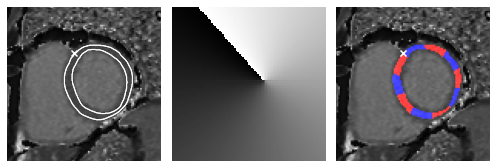

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


float64 0.0 1.3155067155067155


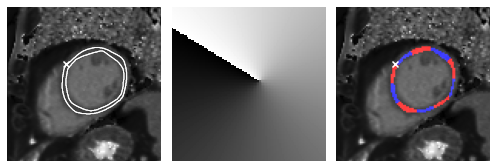

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


float64 0.0 1.2942612942612943


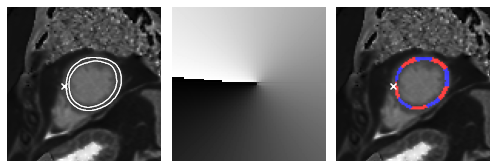

In [3]:
case = cases2[3]
cat = case.categories[0]
for d in range(cat.nr_slices):
    img, anno = cat.get_img(d,0), cat.get_anno(d,0)
    h, w = img.shape
    angle_mask = anno.get_angle_mask_to_middle_point_by_reference_point(h, w)
    xlim=(35, 135); ylim=(75, 175)
    fig, axes = plt.subplots(1,3, figsize=(7,7))
    axes[0].imshow(img, cmap='gray'); axes[0].axis('off')
    axes[0].set(xlim=xlim, ylim=ylim)
    anno.plot_all_contour_outlines(axes[0], c='w')
    anno.plot_all_points(axes[0], c='w')
    axes[1].imshow(angle_mask, cmap='gray', interpolation='nearest'); axes[1].axis('off')
    axes[1].set(xlim=xlim, ylim=ylim)
    
    mask       = np.zeros((h,w,3)).astype(np.float64)
    for i in range(3): mask[:,:,i] = img
    mask       = mask / np.max(mask)
    nr_bins    = 10
    myo_mask   = anno.get_cont_as_mask('lv_myo', h, w)
    bins       = [i*360/nr_bins for i in range(0, nr_bins+1)]
    for i in range(nr_bins):
        low, high = bins[i], bins[i+1]
        if i%2==0:
            mask[:,:,0] += (low<=angle_mask) & (angle_mask<high) & (myo_mask!=0)
        else:
            mask[:,:,2] += (low<=angle_mask) & (angle_mask<high) & (myo_mask!=0)
    print(mask.dtype, np.min(mask), np.max(mask))
    axes[2].imshow(mask); axes[2].axis('off')
    anno.plot_all_points(axes[2], c='w')
    axes[2].set(xlim=xlim, ylim=ylim)
    fig.tight_layout()
    for ax in axes: ax.invert_yaxis()
    plt.show()

POINT (80 102.5)


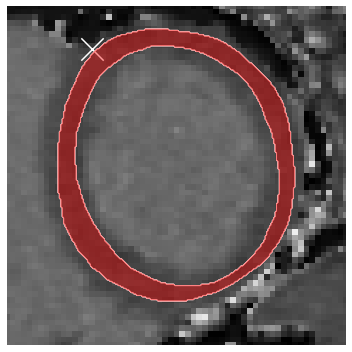

POINT (71 113)


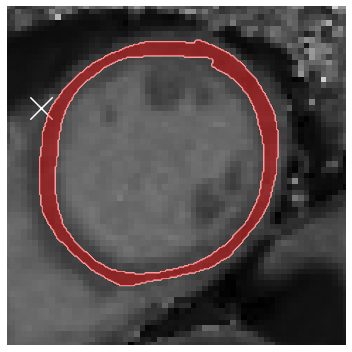

POINT (72.25 123)


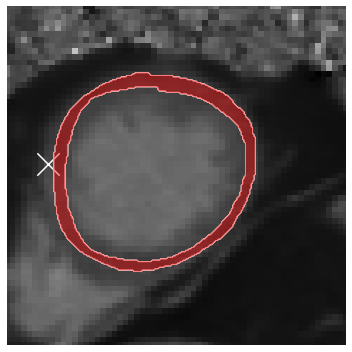

In [4]:
case = cases1[3]
cat = case.categories[0]
for d in range(cat.nr_slices):
    img, anno = cat.get_img(d,0), cat.get_anno(d,0)
    print(anno.get_point('sacardialRefPoint'))
    h, w = img.shape
    xlim=(65, 125); ylim=(95, 155)
    fig, ax = plt.subplots(1,1, figsize=(5,5))
    ax.imshow(img, cmap='gray'); ax.axis('off')
    ax.set(xlim=xlim, ylim=ylim)
    anno.plot_all_contour_outlines(ax, c='w')
    anno.plot_contour_face(ax, 'lv_myo', c='r')
    anno.plot_all_points(ax, c='w', s=500)
    fig.tight_layout()
    ax.invert_yaxis()
    plt.show()

/Users/dietrichhadler/opt/anaconda3/lib/python3.8/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]


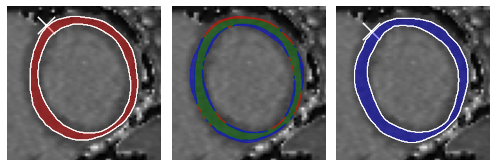

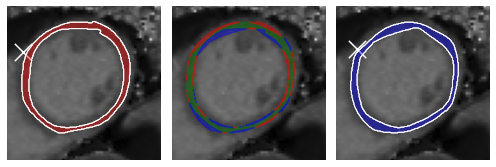

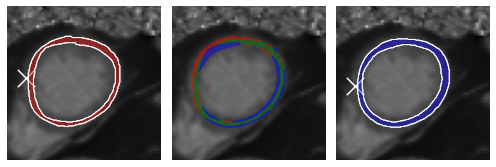

In [5]:
case1, case2 = cases1[3], cases2[3]
cat1 = case1.categories[0]
cat2 = case2.categories[0]
for d in range(cat1.nr_slices):
    img1, anno1 = cat1.get_img(d,0), cat1.get_anno(d,0)
    img2, anno2 = cat2.get_img(d,0), cat2.get_anno(d,0)
    h, w = img1.shape
    xlim=(65, 125); ylim=(95, 155)
    fig, axes = plt.subplots(1,3, figsize=(7,15))
    for ax in axes: 
        ax.imshow(img1, cmap='gray')
        ax.axis('off')
        ax.set(xlim=xlim, ylim=ylim)
    anno1.plot_contour_face(axes[0], 'lv_myo', c='r')
    anno1.plot_all_contour_outlines(axes[0], c='w')
    anno1.plot_all_points(axes[0], c='w', s=300)
    
    anno1.plot_cont_comparison(axes[1], anno2, 'lv_myo')
    
    anno2.plot_contour_face(axes[2], 'lv_myo', c='b')
    anno2.plot_all_contour_outlines(axes[2], c='w')
    anno2.plot_all_points(axes[2], c='w', s=300)
    fig.tight_layout()
    for ax in axes: ax.invert_yaxis()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


float64 0.0 1.3194139194139194


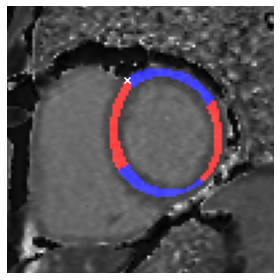

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


float64 0.0 1.3103785103785104


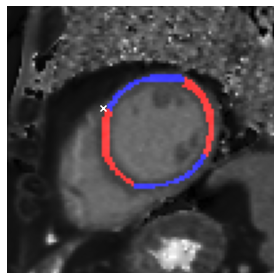

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


float64 0.0 1.3101343101343101


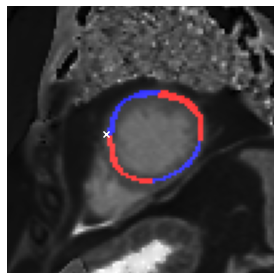

In [6]:
case = cases1[3]
cat = case.categories[0]
for d in range(cat.nr_slices):
    img, anno = cat.get_img(d,0), cat.get_anno(d,0)
    h, w = img.shape
    angle_mask = anno.get_angle_mask_to_middle_point_by_reference_point(h, w)
    xlim=(35, 135); ylim=(75, 175)
    fig, ax = plt.subplots(1,1, figsize=(4,4))
    mask       = np.zeros((h,w,3)).astype(np.float64)
    for i in range(3): mask[:,:,i] = img
    mask       = mask / np.max(mask)
    nr_bins    = 4
    myo_mask   = anno.get_cont_as_mask('lv_myo', h, w)
    bins       = [i*360/nr_bins for i in range(0, nr_bins+1)]
    for i in range(nr_bins):
        low, high = bins[i], bins[i+1]
        if i%2==0:
            mask[:,:,0] += (low<=angle_mask) & (angle_mask<high) & (myo_mask!=0)
        else:
            mask[:,:,2] += (low<=angle_mask) & (angle_mask<high) & (myo_mask!=0)
    print(mask.dtype, np.min(mask), np.max(mask))
    ax.imshow(mask); ax.axis('off')
    anno.plot_all_points(ax, c='w')
    ax.set(xlim=xlim, ylim=ylim)
    fig.tight_layout()
    ax.invert_yaxis()
    plt.show()

<ipython-input-7-93080af3431a>:12: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  basal_v = sh_subtr(lv_ext[1], lv_ext[0])
<ipython-input-7-93080af3431a>:14: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clap_mid = sh_part_way(lv_ext[0], lv_ext[1], 0.5)
<ipython-input-7-93080af3431a>:15: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  base_mid = sh_part_way(clap_mid,  lv_ext[2], 0.2)
<ipython-input-7-93080af3431a>:16: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use 

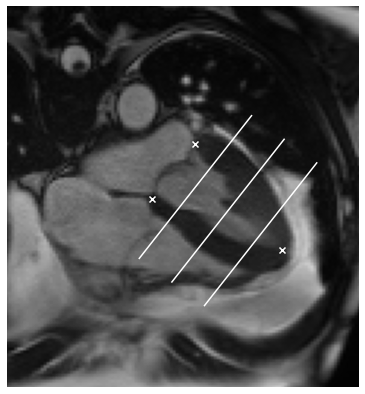

In [7]:
def sh_add(p1, p2):   return Point(p1.x+p2.x, p1.y+p2.y)
def sh_subtr(p1, p2): return Point(p1.x-p2.x, p1.y-p2.y)
def sh_vec_add(p, v, frac=1.0): return Point(p.x+v.x*frac, p.y+v.y*frac)
def sh_part_way(p1, p2, frac=0.5): return sh_vec_add(p1, sh_subtr(p2, p1), frac)

cat.lax_points()
dcm = cat.lax_sop_fps[-1][-1]
img = dcm.pixel_array
anno = cat.lax_sop_fps[-1][-2]
lv_ext = anno.get_point('lv_lax_extent')

basal_v = sh_subtr(lv_ext[1], lv_ext[0])

clap_mid = sh_part_way(lv_ext[0], lv_ext[1], 0.5)
base_mid = sh_part_way(clap_mid,  lv_ext[2], 0.2)
mid_mid  = sh_part_way(clap_mid,  lv_ext[2], 0.5)
apex_mid = sh_part_way(clap_mid,  lv_ext[2], 0.8)

l = 1.3
plane1_st  = sh_vec_add(base_mid, basal_v, -l)
plane1_end = sh_vec_add(base_mid, basal_v,  l)
plane2_st  = sh_vec_add(mid_mid, basal_v,  -l)
plane2_end = sh_vec_add(mid_mid, basal_v,   l)
plane3_st  = sh_vec_add(apex_mid, basal_v, -l)
plane3_end = sh_vec_add(apex_mid, basal_v,  l)

fig, ax = plt.subplots(1,1,figsize=(7,7))
ax.imshow(img, cmap='gray'); ax.axis('off')

#ax.scatter(clap_mid.x, clap_mid.y, c='w', marker='x')

ax.plot([plane1_st.x, plane1_end.x],[plane1_st.y, plane1_end.y], c='w')
ax.plot([plane2_st.x, plane2_end.x],[plane2_st.y, plane2_end.y], c='w')
ax.plot([plane3_st.x, plane3_end.x],[plane3_st.y, plane3_end.y], c='w')

xlim, ylim = (65,185), (15,145)
ax.set(xlim=xlim, ylim=ylim)
anno.plot_all_points(ax)

POINT (71 113)


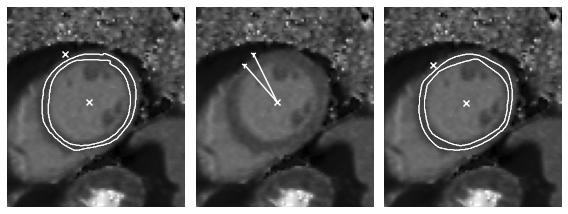

In [8]:
case1 = cases1[3]
case2 = cases2[3]
cat1  = case1.categories[0]
cat2  = case2.categories[0]

d = 1

img1, anno1 = cat1.get_img(d,0), cat1.get_anno(d,0)
img2, anno2 = cat2.get_img(d,0), cat2.get_anno(d,0)
print(anno1.anno['sacardialRefPoint']['cont'])
anno1.anno['sacardialRefPoint']['cont'] = Point(81, 101)
anno2.anno['sacardialRefPoint']['cont'] = Point(77, 106)
h, w = img1.shape
xlim=(55, 135); ylim=(80, 170)
fig, axes = plt.subplots(1,3, figsize=(8,15))
for ax in axes: 
    ax.axis('off')
    ax.imshow(img1, cmap='gray')
    ax.set(xlim=xlim, ylim=ylim)
anno1.plot_all_contour_outlines(axes[0], c='w')
anno1.plot_all_points(axes[0], c='w')
centroid1 = anno1.get_contour('lv_endo').centroid
axes[0].scatter(centroid1.x,centroid1.y, c='w', marker='x')

anno2.plot_all_contour_outlines(axes[2], c='w')
anno2.plot_all_points(axes[2], c='w')
centroid2 = anno2.get_contour('lv_endo').centroid
axes[2].scatter(centroid2.x,centroid2.y, c='w', marker='x')

axes[1].scatter(centroid1.x, centroid1.y, c='w', marker='x')
anno1.plot_point(axes[1], 'sacardialRefPoint', marker='1')
anno2.plot_point(axes[1], 'sacardialRefPoint', marker='1')
ref1 = anno1.get_point('sacardialRefPoint')
x = [centroid1.x, ref1.x]; y = [centroid1.y, ref1.y]
axes[1].plot(x, y, c='w')
ref2 = anno2.get_point('sacardialRefPoint')
x = [centroid1.x, ref2.x]; y = [centroid1.y, ref2.y]
axes[1].plot(x, y, c='w')

for ax in axes: ax.invert_yaxis()
fig.tight_layout()
plt.show()

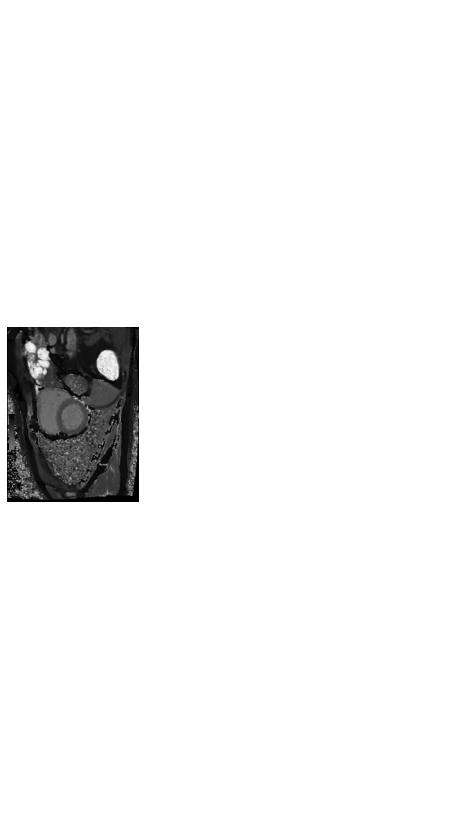

In [9]:
case1 = cases1[3]
case2 = cases2[3]
cat1  = case1.categories[0]
cat2  = case2.categories[0]
img1, anno1 = cat1.get_img(0,0), cat1.get_anno(0,0)
img2, anno2 = cat2.get_img(0,0), cat2.get_anno(0,0)
img1, img2 = img1/np.max(img1), img2/np.max(img2)
h, w = img1.shape
#xlim=(55, 135); ylim=(80, 170)
fig, axes = plt.subplots(1,3, figsize=(8,15))

img = np.zeros((h,w,3))
for i in range(3):
    img[:,:,i] = img1
    
myo1 = anno1.get_cont_as_mask('lv_myo', h,w)
axes[0].imshow(img, cmap='gray')
myo2 = anno2.get_cont_as_mask('lv_myo', h,w)

for ax in axes: 
    ax.axis('off')
    #ax.set(xlim=xlim, ylim=ylim)
    ax.invert_yaxis()
#fig.tight_layout()
plt.show()

In [14]:
def visualize(cc, segBold=[], minv=None, maxv=None):
    cat1 = cc.case1.categories[0]
    cat2 = cc.case2.categories[0]
    means1, stds1 = cat1.calc_mapping_aha_model()
    means2, stds2 = cat2.calc_mapping_aha_model()

    means = np.concatenate((means1[0]-means2[0],
                            means1[1]-means2[1],
                            means1[2]-means2[2]))
    stds  = np.concatenate((stds1[0]-stds2[0], 
                            stds1[1]-stds2[1], 
                            stds1[2]-stds2[2]))

    fig, ax = plt.subplots(1,1, subplot_kw=dict(projection='polar'), figsize=(7,7))
    cmap = plt.cm.bwr
    cmap = plt.cm.get_cmap("gist_gray")
    cmap = plt.cm.get_cmap("PuOr")
    cmap = plt.cm.get_cmap("twilight")
    if minv is None: minv=np.min(means)-5
    if maxv is None: maxv=np.max(means)+5
    minv, maxv = min([minv, -maxv]), max([maxv, -minv])
    minv, maxv = -5, 40
    norm = colors.Normalize(vmin=minv, vmax=maxv)
    means = np.array(means).ravel()
    stds  = np.array(stds) .ravel()
    theta = np.linspace(0, 2*np.pi, 768)
    r = np.linspace(0.2, 1, 4)
    linewidth = 2
    for i in range(r.shape[0]): ax.plot(theta, np.repeat(r[i], theta.shape), '-k', lw=linewidth)
    for i in range(6):
        theta_i = i * 60 * np.pi/180
        ax.plot([theta_i, theta_i], [r[1], 1], '-k', lw=linewidth)
    for i in range(4):
        theta_i = i * 90 * np.pi/180 - 45*np.pi/180
        ax.plot([theta_i, theta_i], [r[0], r[1]], '-k', lw=linewidth)
    r0 = r[2:4]
    r0 = np.repeat(r0[:,np.newaxis], 128, axis=1).T
    for i in range(6):
        theta0 = theta[i*128:i*128+128] + 60*np.pi/180 #+ 60*np.pi/180
        theta0 = np.repeat(theta0[:,np.newaxis], 2, axis=1)
        #write_val(ax, means[i], stds[i], i*60*np.pi/180 + 30*np.pi/180 + 60*np.pi/180, np.mean(r0[0]))
        z = np.ones((128,2)) * means[i]
        ax.pcolormesh(theta0, r0, z, cmap=cmap, norm=norm)
        if i+1 in segBold:
            ax.plot(theta0, r0, '-k', lw=linewidth+2)
            ax.plot(theta0[0 ], [r[2],r[3]], '-k', lw=linewidth+1)
            ax.plot(theta0[-1], [r[2],r[3]], '-k', lw=linewidth+1)
    r0 = r[1:3]
    r0 = np.repeat(r0[:,np.newaxis], 128, axis=1).T
    for i in range(6):
        theta0 = theta[i*128:i*128+128] + 60*np.pi/180 #+ 60*np.pi/180
        theta0 = np.repeat(theta0[:,np.newaxis], 2, axis=1)
        #write_val(ax, means[i+6], stds[i+6],  i*60*np.pi/180 + 30*np.pi/180 + 60*np.pi/180, np.mean(r0[0]))
        z = np.ones((128,2)) * means[i+6]
        ax.pcolormesh(theta0, r0, z, cmap=cmap, norm=norm)
        if i+7 in segBold:
            ax.plot(theta0, r0, '-k', lw=linewidth+2)
            ax.plot(theta0[0 ], [r[1],r[2]], '-k', lw=linewidth+1)
            ax.plot(theta0[-1], [r[1],r[2]], '-k', lw=linewidth+1)
    r0 = r[0:2]
    r0 = np.repeat(r0[:,np.newaxis], 192, axis=1).T
    for i in range(4):
        theta0 = theta[i*192:i*192+192] + 45*np.pi/180  #+ 90*np.pi/180 
        theta0 = np.repeat(theta0[:,np.newaxis], 2, axis=1)
        #write_val(ax,means[i+12], stds[i+12], i*90*np.pi/180 + 90*np.pi/180, np.mean(r0[0]))
        z = np.ones((192,2)) * means[i+12]
        ax.pcolormesh(theta0, r0, z, cmap=cmap, norm=norm)
        if i+13 in segBold:
            ax.plot(theta0, r0, '-k', lw=linewidth+2)
            ax.plot(theta0[0 ], [r[0],r[1]], '-k', lw=linewidth+1)
            ax.plot(theta0[-1], [r[0],r[1]], '-k', lw=linewidth+1)
    ax.set_ylim([0, 1])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    axp    = ax.imshow(np.random.randint(0, 100, (100, 100)))
    cbaxes = fig.add_axes([0.92, 0.15, 0.03, 0.7])  # This is the position for the colorbar
    cb     = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), ax=axp, cax=cbaxes)

def write_val(ax, mean, std, angle, y):
    mean = "{:.1f}".format(float(mean))
    std  = "{:.1f}".format(float(std))
    ax.annotate(str(mean) + '\n(' + str(std) + ')',
            xy                  = (angle, y), # theta, radius
            xytext              = (angle, y), # fraction, fraction
            textcoords          = 'data',     #'figure fraction',
            bbox                = dict(boxstyle="round", fc="1.0", edgecolor="1.0"),
            horizontalalignment = 'center',
            size                = 11,
            verticalalignment   = 'center',
            )

AHA as three individual slices.
AHA as three individual slices.


<ipython-input-14-90cfcd85b6ae>:43: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(theta0, r0, z, cmap=cmap, norm=norm)
<ipython-input-14-90cfcd85b6ae>:55: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(theta0, r0, z, cmap=cmap, norm=norm)
<ipython-input-14-90cfcd85b6ae>:67: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilatera

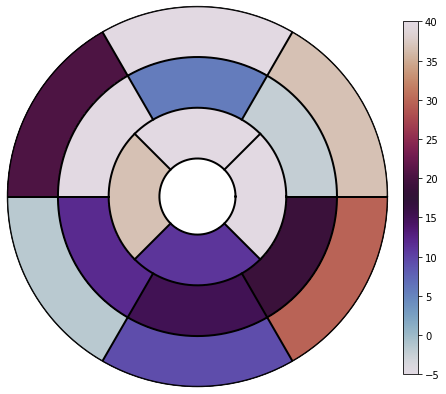

In [17]:
cc = Case_Comparison(cases1[5], cases2[5])
visualize(cc, minv=None, maxv=None)